In [1]:
#loading dataset
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# data preprocessing
from sklearn.preprocessing import StandardScaler

# data splitting
from sklearn.model_selection import train_test_split

# data modeling
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# All Model`s
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.ensemble import  GradientBoostingClassifier

c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"F:\PCA_50_features\PCA_50_features new.csv")
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,result
32889,-4.615466,-1.097486,-1.173411,-0.757187,0.129511,-0.811956,0.672797,-0.055069,0.770837,0.381761,...,-0.472527,-0.096940,-1.114660,0.368823,-0.042275,0.208819,-0.209009,-0.126064,-0.017239,0
26737,-4.525394,-3.027480,0.981243,0.861308,-0.571858,-0.826829,-1.175528,-0.771928,-1.285114,-0.513875,...,-0.248241,0.160844,-0.254704,0.161639,0.301187,0.004167,0.490449,-0.108993,0.567990,0
35104,32.715043,-7.763818,2.700662,1.468844,8.450149,1.550413,8.179884,-13.111715,5.615062,-6.101890,...,0.501249,-0.513588,-1.650305,-1.983066,1.659197,1.435272,-1.662852,1.434866,0.571060,0
41564,-6.236487,-1.273823,2.085766,-0.597569,0.659343,2.207896,-0.366477,1.324771,-0.670788,-0.356527,...,-0.440837,0.097233,-0.174056,-0.406829,-0.241666,0.360363,-0.130476,-0.347375,0.280721,1
26395,-3.831770,-1.533552,2.523852,0.964517,-0.071798,1.597984,0.291536,-0.150441,-1.031026,1.651239,...,-0.264714,-0.027281,-0.375738,-0.020852,-0.759470,-0.121474,0.024825,-0.080701,0.048525,0


In [4]:
df.result.value_counts()

0    42209
1     5667
Name: result, dtype: int64

In [5]:
pip install tensorflow-addons

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\siddh\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [6]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

from tensorflow_addons import losses

In [7]:
from sklearn.model_selection import train_test_split

X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [8]:
X.shape,y.shape

((47876, 50), (47876,))

In [9]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (33513, 50)
Number transactions y_train dataset:  (33513,)
Number transactions X_test dataset:  (14363, 50)
Number transactions y_test dataset:  (14363,)


In [10]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 3975
Before OverSampling, counts of label '0': 29538 

After OverSampling, the shape of train_X: (59076, 50)
After OverSampling, the shape of train_y: (59076,) 

After OverSampling, counts of label '1': 29538
After OverSampling, counts of label '0': 29538


In [11]:
X_test.shape,y_test.shape

((14363, 50), (14363,))

In [12]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

XGBOOST MODEL

In [13]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_res, y_train_res)

print_score(xgb_clf, X_train_res, y_train_res, X_test, y_test, train=True)
print_score(xgb_clf, X_train_res, y_train_res, X_test, y_test, train=False)

[20:25:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Result:
Accuracy Score: 97.26%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.984552      0.961148  0.972561      0.972850      0.972850
recall         0.960187      0.984935  0.972561      0.972561      0.972561
f1-score       0.972217      0.972896  0.972561      0.972557      0.972557
support    29538.000000  29538.000000  0.972561  59076.000000  59076.000000
_______________________________________________
Confusion Matrix: 
 [[28362  1176]
 [  445 29093]]

Test Result:
Accuracy Score: 88.32%
_______________________________________________
CLASSIFICATION REP

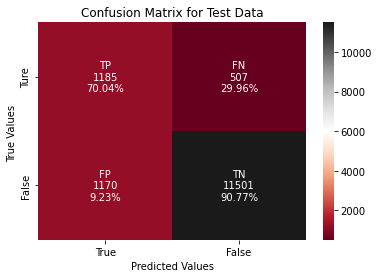

In [14]:
y_pred = xgb_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))

group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = xgb_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_xgb_clf,true_positive_rate_xgb_clf,threshold_xgb_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8932369721220792

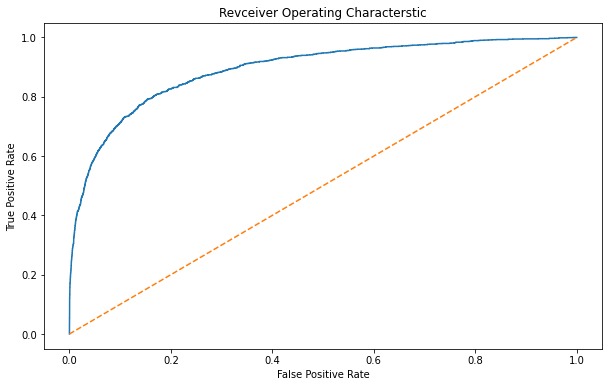

In [16]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_xgb_clf,true_positive_rate_xgb_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

LGBM MODEL

In [17]:
from lightgbm import LGBMClassifier
lgbmc_clf = LGBMClassifier(int = 10,) 
lgbmc_clf.fit(X_train_res, y_train_res)

print_score(lgbmc_clf, X_train_res, y_train_res, X_test, y_test, train=True)
print_score(lgbmc_clf, X_train_res, y_train_res, X_test, y_test, train=False)

[LightGBM] [Warning] Unknown parameter: int
Train Result:
Accuracy Score: 91.09%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.921605      0.900779  0.910928      0.911192      0.911192
recall         0.898267      0.923590  0.910928      0.910928      0.910928
f1-score       0.909786      0.912042  0.910928      0.910914      0.910914
support    29538.000000  29538.000000  0.910928  59076.000000  59076.000000
_______________________________________________
Confusion Matrix: 
 [[26533  3005]
 [ 2257 27281]]

Test Result:
Accuracy Score: 85.41%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.961995     0.430922  0.854139      0.696459      0.899434
recall         0.868992     0.742908  0.854139      0.805950      0.854139
f1-score       0.913132     0.545455

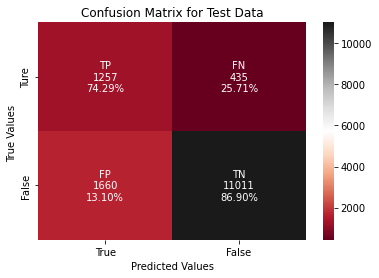

In [18]:
y_pred = lgbmc_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))

group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = lgbmc_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf,threshold_lgbmc_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8918063305330595

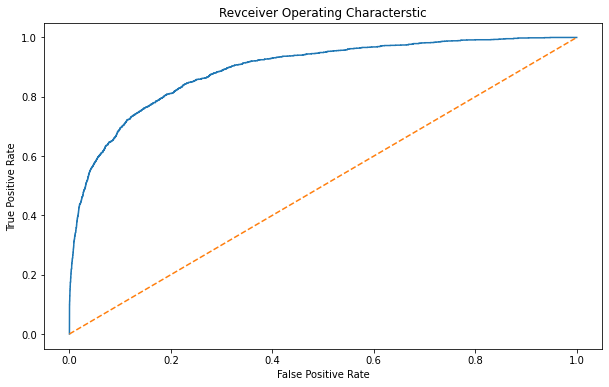

In [20]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

SUPPORT VECTOR METHOD

In [21]:
from sklearn.svm import SVC

svm_clf = SVC(probability=True, C=5,)
svm_clf.fit(X_train_res, y_train_res)

print_score(svm_clf, X_train_res, y_train_res, X_test, y_test, train=True)
print_score(svm_clf, X_train_res, y_train_res, X_test, y_test, train=False)

Train Result:
Accuracy Score: 92.25%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.948340      0.899488  0.922507      0.923914      0.923914
recall         0.893696      0.951317  0.922507      0.922507      0.922507
f1-score       0.920208      0.924677  0.922507      0.922442      0.922442
support    29538.000000  29538.000000  0.922507  59076.000000  59076.000000
_______________________________________________
Confusion Matrix: 
 [[26398  3140]
 [ 1438 28100]]

Test Result:
Accuracy Score: 85.37%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.962134     0.429986  0.853652      0.696060      0.899445
recall         0.868282     0.744090  0.853652      0.806186      0.853652
f1-score       0.912802     0.545022  0.853652      0.728912      0.869476
suppo

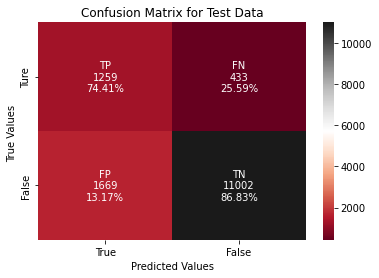

In [22]:
y_pred = svm_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))

group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = svm_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_svm_clf,true_positive_rate_svm_clf,threshold_svm_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.890373659962913

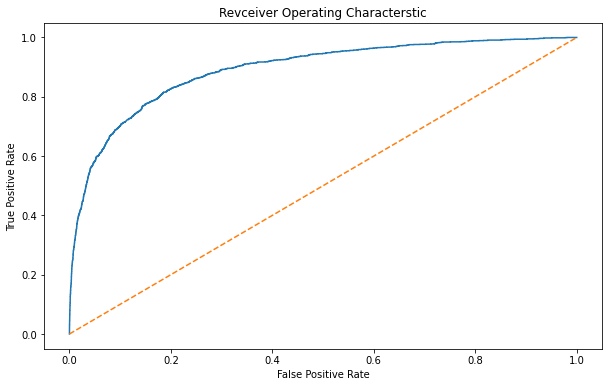

In [24]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_svm_clf,true_positive_rate_svm_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=40, leaf_size=30)
knn_clf.fit(X_train_res, y_train_res)

print_score(knn_clf, X_train_res, y_train_res, X_test, y_test, train=True)
print_score(knn_clf, X_train_res, y_train_res, X_test, y_test, train=False)

Train Result:
Accuracy Score: 83.81%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.959724      0.767396  0.838124      0.863560      0.863560
recall         0.705870      0.970377  0.838124      0.838124      0.838124
f1-score       0.813452      0.857032  0.838124      0.835242      0.835242
support    29538.000000  29538.000000  0.838124  59076.000000  59076.000000
_______________________________________________
Confusion Matrix: 
 [[20850  8688]
 [  875 28663]]

Test Result:
Accuracy Score: 70.70%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.974649     0.269090  0.707025      0.621870      0.891533
recall         0.685739     0.866430  0.707025      0.776085      0.707025
f1-score       0.805059     0.410644  0.707025      0.607852      0.758596
suppo

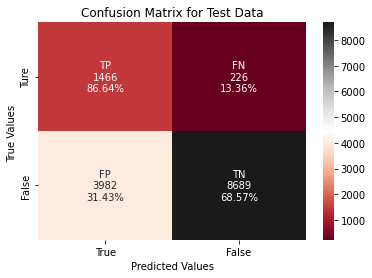

In [26]:
y_pred = knn_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))

group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [27]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = knn_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_knn_clf,true_positive_rate_knn_clf,threshold_knn_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8836791416822128

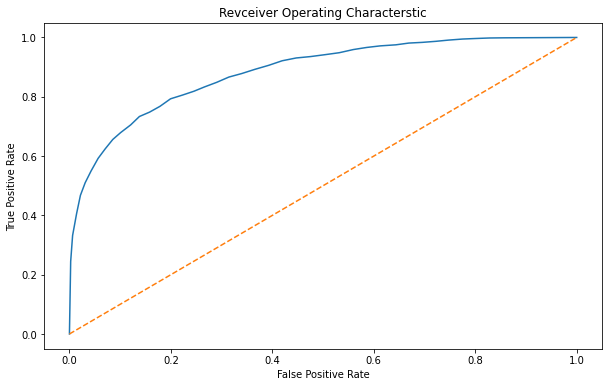

In [28]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_knn_clf,true_positive_rate_knn_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

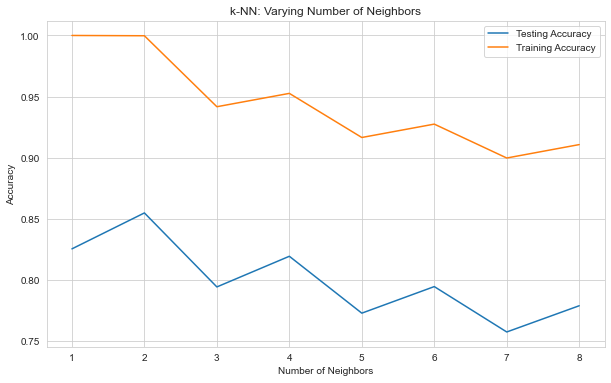

In [29]:
from sklearn.neighbors import KNeighborsClassifier
no_neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn_clf.fit(X_train_res, y_train_res)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn_clf.score(X_train_res, y_train_res)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn_clf.score(X_test, y_test)

# Visualization of k values vs accuracy
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

GRADIENT BOOSTING CLASSIFER

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier( min_samples_split=30, min_samples_leaf=10,)
gb_clf.fit(X_train_res, y_train_res)

print_score(gb_clf, X_train_res, y_train_res, X_test, y_test, train=True)
print_score(gb_clf, X_train_res, y_train_res, X_test, y_test, train=False)

Train Result:
Accuracy Score: 83.35%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.843709      0.823821  0.833469      0.833765      0.833765
recall         0.818573      0.848365  0.833469      0.833469      0.833469
f1-score       0.830951      0.835913  0.833469      0.833432      0.833432
support    29538.000000  29538.000000  0.833469  59076.000000  59076.000000
_______________________________________________
Confusion Matrix: 
 [[24179  5359]
 [ 4479 25059]]

Test Result:
Accuracy Score: 79.20%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.959916     0.331160  0.792035      0.645538      0.885847
recall         0.797569     0.750591  0.792035      0.774080      0.792035
f1-score       0.871244     0.459562  0.792035      0.665403      0.822747
suppo

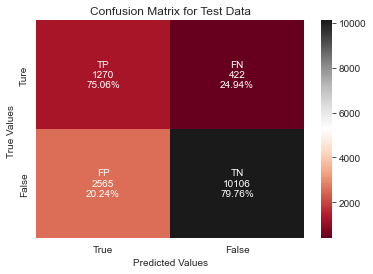

In [31]:
y_pred = gb_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))

group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = gb_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_gb_clf,true_positive_rate_gb_clf,threshold_gb_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8501629621669183

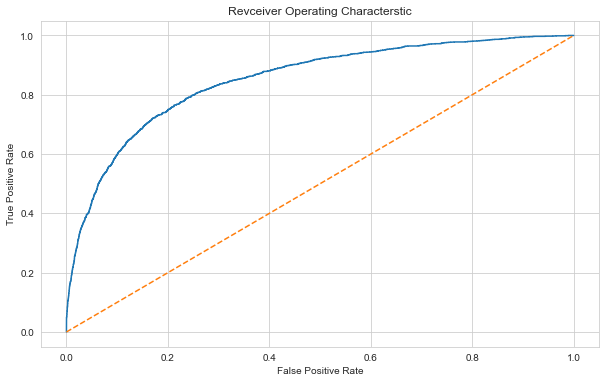

In [33]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_gb_clf,true_positive_rate_gb_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

##  Decision Tree Classifier 

In [34]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=100,)
tree_clf.fit(X_train_res, y_train_res)

print_score(tree_clf, X_train_res, y_train_res, X_test, y_test, train=True)
print_score(tree_clf, X_train_res, y_train_res, X_test, y_test, train=False)

Train Result:
Accuracy Score: 81.68%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.828708      0.805684  0.816778      0.817196      0.817196
recall         0.798632      0.834925  0.816778      0.816778      0.816778
f1-score       0.813392      0.820044  0.816778      0.816718      0.816718
support    29538.000000  29538.000000  0.816778  59076.000000  59076.000000
_______________________________________________
Confusion Matrix: 
 [[23590  5948]
 [ 4876 24662]]

Test Result:
Accuracy Score: 75.23%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.948789     0.278451   0.75235      0.613620      0.869821
recall         0.760319     0.692671   0.75235      0.726495      0.752350
f1-score       0.844162     0.397221   0.75235      0.620691      0.791511
suppo

## CONFUSION MATRIX FOR TEST 

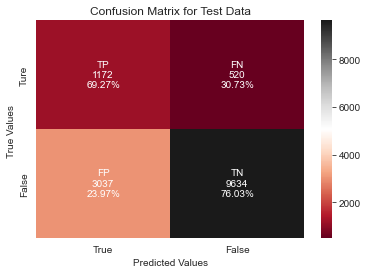

In [35]:
y_pred = tree_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

## ROC FOR TEST

In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = tree_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_tree_clf,true_positive_rate_tree_clf,threshold_tree_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8073256200333108

## ROC CURVE

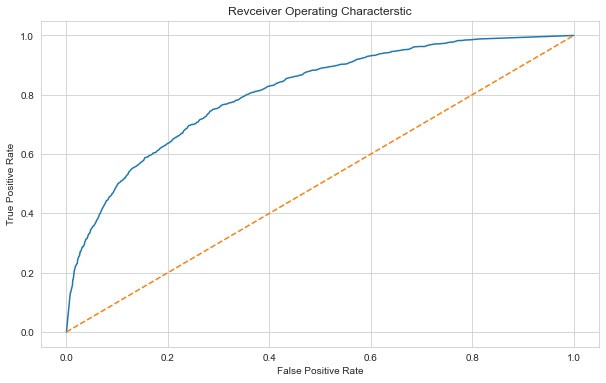

In [37]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_tree_clf,true_positive_rate_tree_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

##  Random Forest CLASSIFIER

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(min_samples_split=10, min_samples_leaf=100,)
rf_clf.fit(X_train_res, y_train_res)

print_score(rf_clf,X_train_res, y_train_res, X_test, y_test, train=True)
print_score(rf_clf, X_train_res, y_train_res, X_test, y_test, train=False)

Train Result:
Accuracy Score: 87.70%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.868157      0.886291  0.877006      0.877224      0.877224
recall         0.889024      0.864987  0.877006      0.877006      0.877006
f1-score       0.878467      0.875510  0.877006      0.876988      0.876988
support    29538.000000  29538.000000  0.877006  59076.000000  59076.000000
_______________________________________________
Confusion Matrix: 
 [[26260  3278]
 [ 3988 25550]]

Test Result:
Accuracy Score: 84.01%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.956285     0.399132  0.840145      0.677708      0.890651
recall         0.858022     0.706265  0.840145      0.782144      0.840145
f1-score       0.904493     0.510030  0.840145      0.707261      0.858024
suppo

## CONFUSION MATRIX FOR TEST

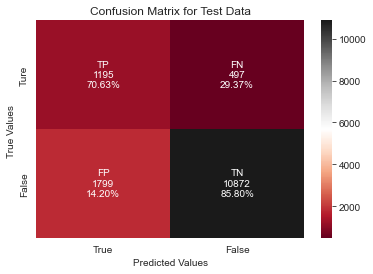

In [39]:
y_pred = rf_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

## ROC FOR TEST

In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = rf_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_rf_clf,true_positive_rate_rf_clf,threshold_rf_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.872639968446778

## ROC CURVE

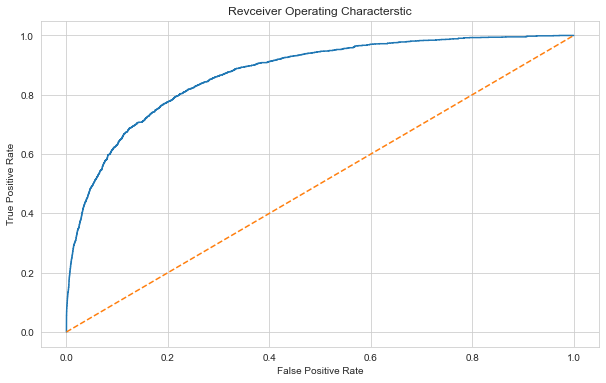

In [41]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_rf_clf,true_positive_rate_rf_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

##  Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(n_jobs=20,)
lr_clf.fit(X_train_res, y_train_res)

print_score(lr_clf, X_train_res, y_train_res, X_test, y_test, train=True)
print_score(lr_clf, X_train_res, y_train_res, X_test, y_test, train=False)

Train Result:
Accuracy Score: 75.58%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.768771      0.744065  0.755823      0.756418      0.756418
recall         0.731735      0.779911  0.755823      0.755823      0.755823
f1-score       0.749796      0.761566  0.755823      0.755681      0.755681
support    29538.000000  29538.000000  0.755823  59076.000000  59076.000000
_______________________________________________
Confusion Matrix: 
 [[21614  7924]
 [ 6501 23037]]

Test Result:
Accuracy Score: 72.42%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.953075     0.261153  0.724152      0.607114      0.871564
recall         0.722911     0.733452  0.724152      0.728181      0.724152
f1-score       0.822188     0.385164  0.724152      0.603676      0.770706
suppo

## CONFUSION MATRIX FOR TEST

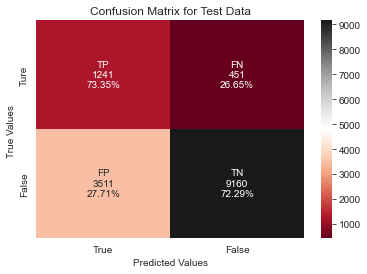

In [43]:
y_pred = lr_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))

group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

## ROC VALUE FOR TEST

In [44]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = lr_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_lr_clf,true_positive_rate_lr_clf,threshold_lr_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.7938510864051176

## ROC CURVE

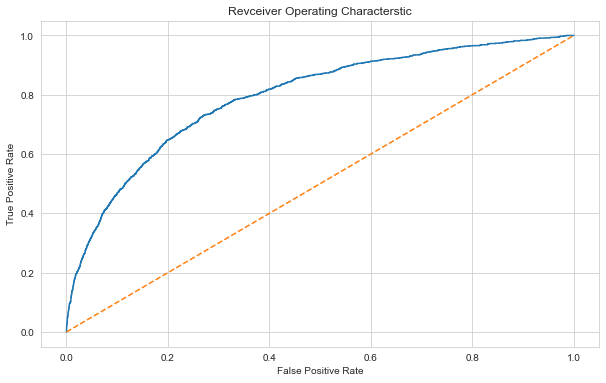

In [45]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_lr_clf,true_positive_rate_lr_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [46]:
from sklearn.metrics import auc

auc_lr=auc(false_positive_rate_lr_clf,true_positive_rate_lr_clf)
auc_knn=auc(false_positive_rate_knn_clf,true_positive_rate_knn_clf)
auc_svm=auc(false_positive_rate_svm_clf,true_positive_rate_svm_clf)
auc_lgbmc=auc(false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf)
auc_tree=auc(false_positive_rate_tree_clf,true_positive_rate_tree_clf)
auc_rf=auc(false_positive_rate_rf_clf,true_positive_rate_rf_clf)
auc_xgb=auc(false_positive_rate_xgb_clf,true_positive_rate_xgb_clf)
auc_gb=auc(false_positive_rate_gb_clf,true_positive_rate_gb_clf)

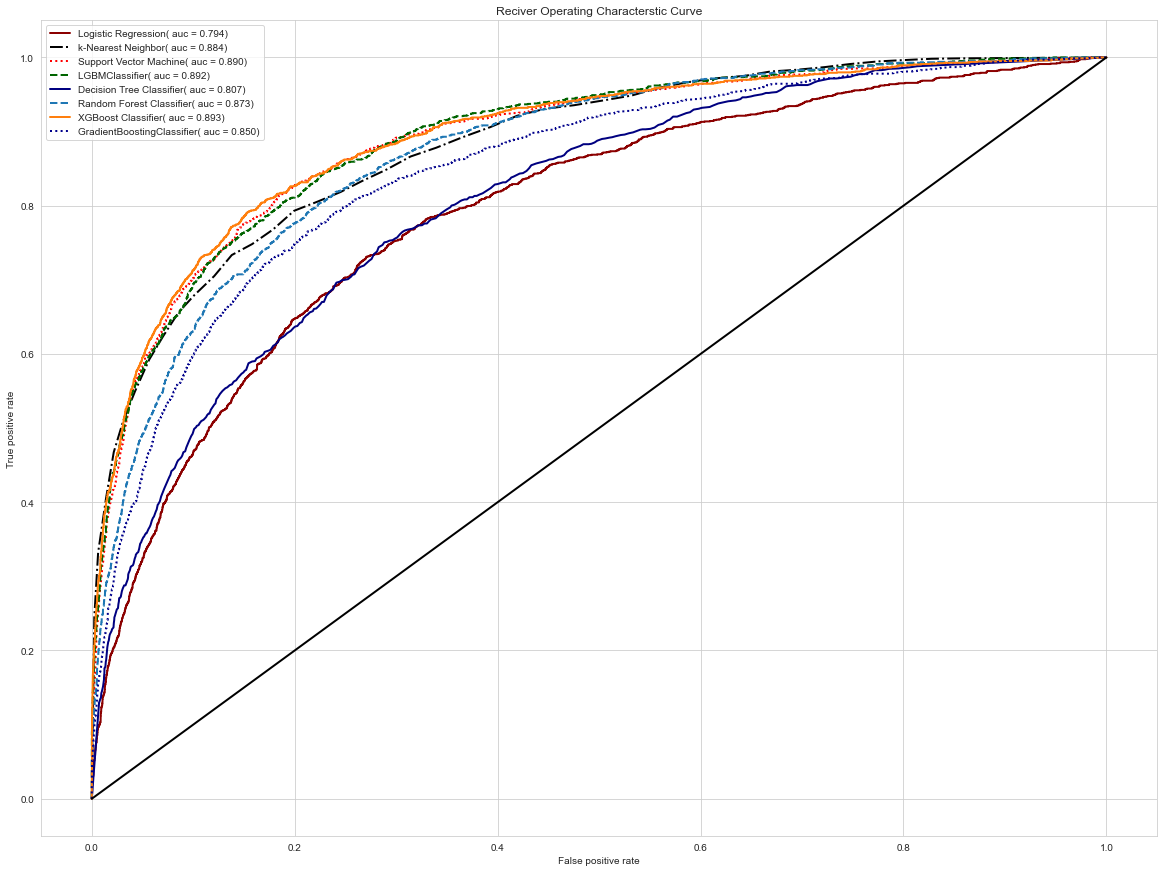

In [47]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,15))
plt.title('Reciver Operating Characterstic Curve')

plt.plot(false_positive_rate_lr_clf,true_positive_rate_lr_clf,linewidth=2,color="darkred",linestyle='-',label='Logistic Regression( auc = %0.3f)' % auc_lr)
plt.plot(false_positive_rate_knn_clf,true_positive_rate_knn_clf,linewidth=2,color="black",linestyle='-.',label='k-Nearest Neighbor( auc = %0.3f)' % auc_knn)
plt.plot(false_positive_rate_svm_clf,true_positive_rate_svm_clf,linewidth=2,color="red",linestyle=':',label='Support Vector Machine( auc = %0.3f)' % auc_svm)
plt.plot(false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf,linewidth=2,color="darkgreen",linestyle='dashed',label='LGBMClassifier( auc = %0.3f)' % auc_lgbmc)
plt.plot(false_positive_rate_tree_clf,true_positive_rate_tree_clf,linewidth=2,color="navy",linestyle='solid',label='Decision Tree Classifier( auc = %0.3f)' % auc_tree)
plt.plot(false_positive_rate_rf_clf,true_positive_rate_rf_clf,linewidth=2,linestyle='--',label='Random Forest Classifier( auc = %0.3f)' % auc_rf)
plt.plot(false_positive_rate_xgb_clf,true_positive_rate_xgb_clf,linewidth=2,linestyle='-',label='XGBoost Classifier( auc = %0.3f)' % auc_xgb)
plt.plot(false_positive_rate_gb_clf,true_positive_rate_gb_clf,linewidth=2,color="darkblue",linestyle='dotted',label='GradientBoostingClassifier( auc = %0.3f)' % auc_gb)

plt.plot([0,1],linewidth=2,color="black",linestyle='-')
#plt.plot([0,0],[1,0],c='.1')
#plt.plot([1,1],c='.1')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()